In [1]:
library("tidyverse")
library("ggrepel")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Assignment #4

## Due on October 22nd, 2020
## Eileen Yang

Uncomment and run the following cell to set up the marathon data. 👇

In [2]:
df_marathon = read.csv('https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/data/marathon.csv')

 df_filtered = df_marathon %>% 
     filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan'))

 df_country = df_marathon %>%
     filter(country %in% c('United States', 'Kenya', 'Ethiopia', 'Japan')) %>%
     group_by(country, MF) %>%
     summarize(race.time = mean(race.time), year = mean(year))

`summarise()` regrouping output by 'country' (override with `.groups` argument)



This cell represents the progress we made on the marathon visualization in class. Add theme adjustments to create a chart with your own style. 

**This is a great resource for theme elements that you can adjust:** https://ggplot2.tidyverse.org/reference/theme.html

Here is a nice gallery of themes that you might base your work on: https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/

At minimum adjust the following chart attributes:
- `plot.background` and `panel.background`
- Use `labs` to improve the x and y-axis labels
- Add a title and subtitle with the `labs` or the `ggtitle` function ([hint](https://ggplot2.tidyverse.org/reference/labs.html))

If you want your title to line up with the left side of you "plot" instead of your "panel" use this inside your `theme` function:
```R
plot.title.position = "plot"
```

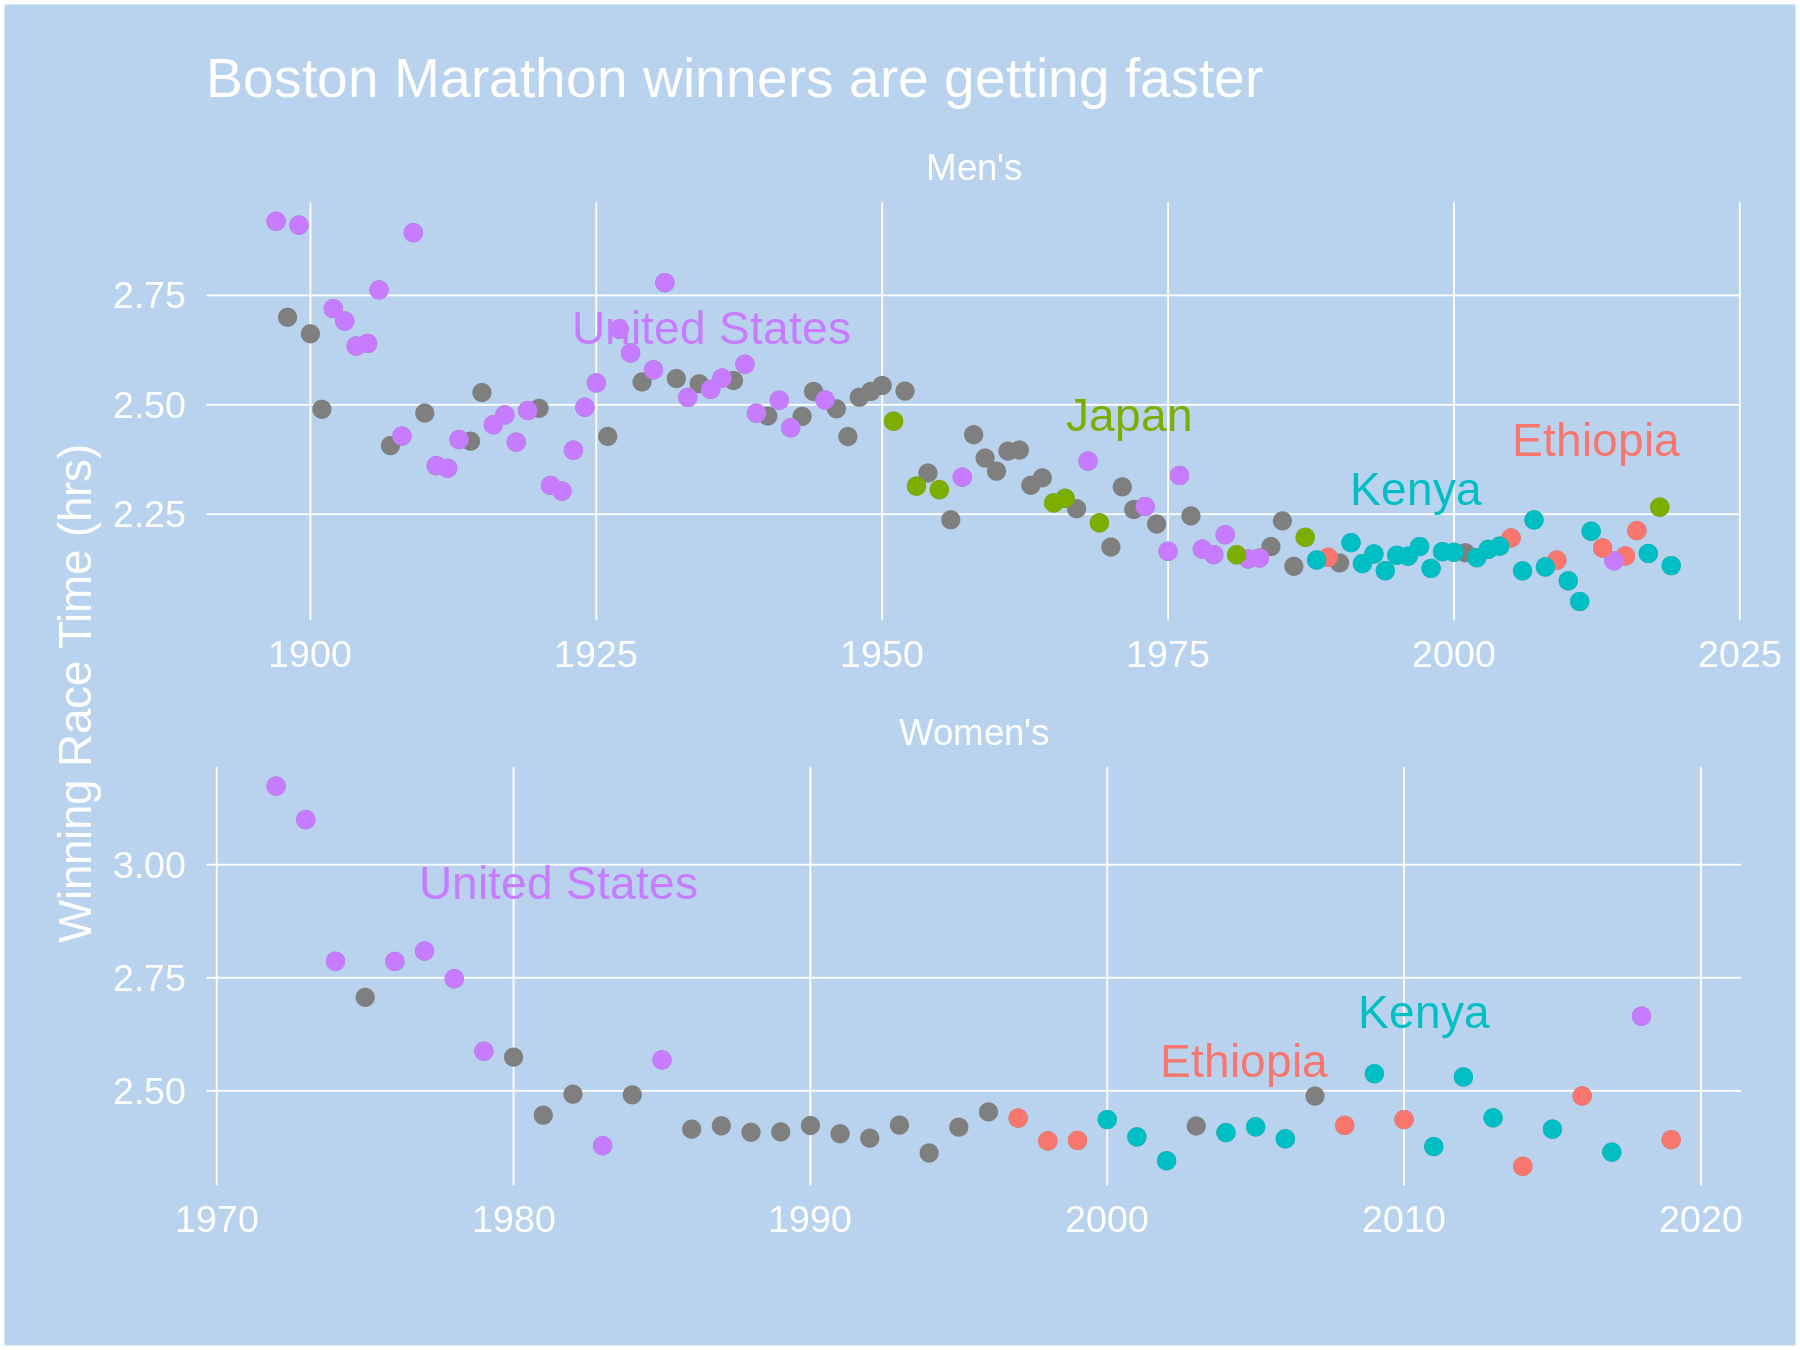

In [95]:
options(repr.plot.width = 6, repr.plot.height = 4.5, repr.plot.res = 300)

p = ggplot(df_marathon, aes(x = year, y = race.time))

p = p + geom_point(color = 'gray50')

p = p + geom_point(data = df_filtered, aes(color = country))

p = p + geom_text_repel(
    segment.color = 'transparent',
    nudge_y = 0.2,
    data = df_country, 
    aes(label = country, color = country)
)

p = p + facet_wrap(~MF, scales = "free", ncol = 1) + theme(strip.background = element_rect(fill = NA), 
                                                           strip.text.x = element_text(colour = "white"))

p = p + theme(legend.position = 'none')

#ggtitle('Boston Marathon winners are getting faster') + 

p = p + labs(subtitle = 'Winning times for the Boston Marathon are decreasing among men and women')

p = p + labs(x= ' ', y= 'Winning Race Time (hrs)')

p = p + theme(plot.background = element_rect(fill = "slategray2",  size = 1, linetype = "solid"))

p = p + theme(panel.background = element_rect(fill = "slategray2",  size = 1, linetype = "solid"))

p = p + theme(axis.text = element_text(size=9, colour="white"), 
              axis.title.y = element_text(colour = "white"), 
              axis.ticks = element_blank(),
              plot.title = element_text(colour="white"), 
              panel.grid.minor=element_blank(),
              panel.grid.major=element_line(size=.2),
              plot.margin = margin(5, 5, 5, 5, "mm"))

p

Here is my solution...

<img src="./04_example.png" style="width: 800px;" />